In [12]:
import json
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import Point, Polygon


# JSON data
district_data = {
    "type": "Feature",
    "properties": {
        "@id": "relation/8852697",
        "admin_level": "8",
        "boundary": "administrative",
        "name": "Kozyatağı Mahallesi",
        "postal_code": "34742",
        "type": "boundary"
    },
    "geometry": {
        "type": "Polygon",
        "coordinates": [
            [
                [29.0979186, 40.9772495],
                [29.097408, 40.9769335],
                [29.0970486, 40.9765731],
                [29.0965068, 40.9759858],
                [29.0961528, 40.9753662],
                [29.0958148, 40.974621],
                [29.0952381, 40.9735598],
                [29.0951899, 40.9735173],
                [29.0947393, 40.9738535],
                [29.0942752, 40.9740904],
                [29.0934813, 40.9742767],
                [29.0929234, 40.9738089],
                [29.0928322, 40.9737319],
                [29.0925693, 40.9734262],
                [29.0923816, 40.9732479],
                [29.0922287, 40.9730313],
                [29.0921053, 40.9729017],
                [29.0918559, 40.9725736],
                [29.0917245, 40.9724419],
                [29.091593, 40.972282],
                [29.0913784, 40.9720248],
                [29.0907991, 40.9712451],
                [29.0901634, 40.9704249],
                [29.0894312, 40.9695318],
                [29.0887231, 40.9687318],
                [29.0886077, 40.968588],
                [29.0882215, 40.9681202],
                [29.0876797, 40.967065],
                [29.0874839, 40.9669111],
                [29.0872425, 40.9667328],
                [29.0869153, 40.9665607],
                [29.0870923, 40.9662245],
                [29.08739, 40.9657465],
                [29.0876555, 40.9654366],
                [29.0885246, 40.9644786],
                [29.0889001, 40.9640958],
                [29.0892085, 40.963713],
                [29.0895706, 40.9633809],
                [29.0898335, 40.9632209],
                [29.0903485, 40.9629333],
                [29.0909681, 40.9625565],
                [29.0913275, 40.9623418],
                [29.0924942, 40.9616532],
                [29.0927061, 40.9615033],
                [29.0929314, 40.9612866],
                [29.0932023, 40.9610516],
                [29.0937307, 40.9605047],
                [29.0938635, 40.9603852],
                [29.0940043, 40.9604895],
                [29.0943691, 40.960769],
                [29.0945368, 40.9609027],
                [29.0947084, 40.9610091],
                [29.095104, 40.9612704],
                [29.0953132, 40.9614],
                [29.0958081, 40.9617119],
                [29.0960495, 40.9619124],
                [29.0968448, 40.9625707],
                [29.0971237, 40.962676],
                [29.0974939, 40.9628381],
                [29.0978748, 40.9630284],
                [29.0984541, 40.9633242],
                [29.0988296, 40.9635429],
                [29.0995967, 40.9639885],
                [29.0999401, 40.9641586],
                [29.100219, 40.9642761],
                [29.1005999, 40.9644017],
                [29.1009915, 40.9645353],
                [29.1011417, 40.9645353],
                [29.1012222, 40.9646812],
                [29.1014582, 40.9649647],
                [29.1018552, 40.9654144],
                [29.1022843, 40.9660422],
                [29.102633, 40.9664756],
                [29.1029817, 40.9669171],
                [29.1031802, 40.9671602],
                [29.1034769, 40.9673496],
                [29.1031597, 40.9678536],
                [29.1024036, 40.9692511],
                [29.1018094, 40.9703539],
                [29.1005465, 40.9731641],
                [29.0983247, 40.9765733],
                [29.0981333, 40.976867],
                [29.0979551, 40.9771865],
                [29.0979186, 40.9772495]
            ]
        ]
    },
    "id": "relation/8852697"
}


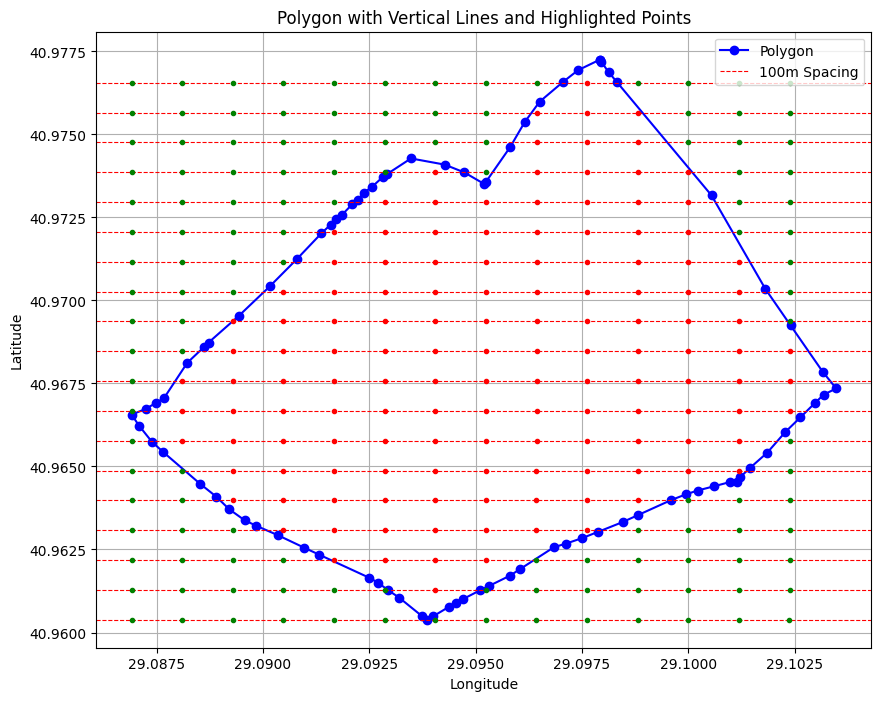

In [13]:

# Extract coordinates
coordinates = district_data["geometry"]["coordinates"][0]
polygon = Polygon(coordinates)

# Separate the longitude and latitude
longitudes, latitudes = zip(*coordinates)

# Plot the polygon
plt.figure(figsize=(10, 8))
plt.plot(longitudes, latitudes, marker="o", linestyle="-", color="blue", label="Polygon")

# Calculate vertical lines spaced 100 meters apart
lat_spacing = 100 / 111320
min_lat = min(latitudes)
max_lat = max(latitudes)
lat_lines = np.arange(min_lat, max_lat, lat_spacing)

# Draw the vertical lines and add dots
for lat in lat_lines:
    plt.axhline(y=lat, color='red', linestyle='--', linewidth=0.8, label='100m Spacing' if lat == lat_lines[0] else "")
    # Add dots every 100 meters along the line
    min_lon = min(longitudes)
    max_lon = max(longitudes)
    lon_spacing = 100 / (111320 * np.cos(np.radians(lat)))  # Adjust for longitude scaling
    lon_points = np.arange(min_lon, max_lon, lon_spacing)
    for lon in lon_points:
        point = Point(lon, lat)
        if polygon.contains(point):
            plt.plot(lon, lat, 'ro', markersize=3)  # Red for points inside the polygon
        else:
            plt.plot(lon, lat, 'go', markersize=3)  # Green for points outside the polygon

plt.legend()
plt.title("Polygon with Vertical Lines and Highlighted Points")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

Red Points (inside the polygon):
(np.float64(29.094052752939994), np.float64(40.96128351117499))
(np.float64(29.09167366672439), np.float64(40.96218182234998))
(np.float64(29.092863258405487), np.float64(40.96218182234998))
(np.float64(29.094052850086584), np.float64(40.96218182234998))
(np.float64(29.09524244176768), np.float64(40.96218182234998))
(np.float64(29.090484123618783), np.float64(40.963080133524976))
(np.float64(29.09167373149171), np.float64(40.963080133524976))
(np.float64(29.092863339364637), np.float64(40.963080133524976))
(np.float64(29.094052947237564), np.float64(40.963080133524976))
(np.float64(29.09524255511049), np.float64(40.963080133524976))
(np.float64(29.09643216298342), np.float64(40.963080133524976))
(np.float64(29.097621770856346), np.float64(40.963080133524976))
(np.float64(29.089294548130987), np.float64(40.96397844469997))
(np.float64(29.09048417219648), np.float64(40.96397844469997))
(np.float64(29.091673796261972), np.float64(40.96397844469997))
(np.fl

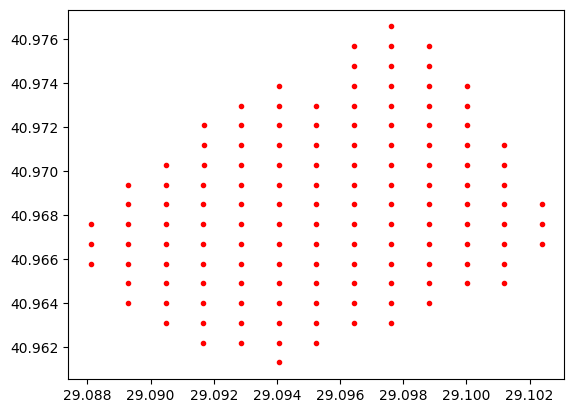

In [14]:
from shapely.geometry import Point, Polygon

# Create the polygon using Shapely
polygon = Polygon(coordinates)

# List to store coordinates of points inside the polygon
red_points = []

# Iterate through the latitude lines
for lat in lat_lines:
    min_lon = min(longitudes)
    max_lon = max(longitudes)
    lon_spacing = 100 / (111320 * np.cos(np.radians(lat)))  # Adjust for longitude scaling
    lon_points = np.arange(min_lon, max_lon, lon_spacing)
    
    # Check each point if it is inside the polygon
    for lon in lon_points:
        point = Point(lon, lat)
        if polygon.contains(point):
            red_points.append((lon, lat))

# Print the coordinates of the red points
print("Red Points (inside the polygon):")
for point in red_points:
    print(point)

# Plotting remains the same, but we now mark red points explicitly
for lon, lat in red_points:
    plt.plot(lon, lat, 'ro', markersize=3)  # Red for points inside the polygon
